In [1]:
import tensorflow_datasets as tfds
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
# from sklearn.utils.class_weight import compute_class_weight
import string

In [2]:
builder = tfds.builder('emnist', data_dir='tensorflow_datasets')

x_train, y_train = tfds.as_numpy(builder.as_dataset(split='train', shuffle_files=True, batch_size=-1, as_supervised=True,))
x_test, y_test = tfds.as_numpy(builder.as_dataset(split='test', shuffle_files=True, batch_size=-1, as_supervised=True,))

2022-06-10 19:23:36.300486: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-10 19:23:36.388495: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-10 19:23:36.388682: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-10 19:23:36.389284: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [3]:
labels = string.digits+string.ascii_uppercase+string.ascii_lowercase
print(labels)

0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz


In [4]:
img_side = 28

unique_classes = np.unique(y_train)
num_classes = len(unique_classes)

input_shape = (img_side, img_side, 1)

# weight the classes (to combat the imbalance)
# class_weights = dict(enumerate(compute_class_weight('balanced', unique_classes, y_train)))

In [5]:
x_train = x_train.transpose(0,2,1,3)
x_test = x_test.transpose(0,2,1,3)

y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [6]:
kernel_size = (5, 5)
def createmodel():
    return tf.keras.models.Sequential([
        tf.keras.layers.Convolution2D(16, kernel_size=kernel_size, padding='same', input_shape=input_shape, activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Convolution2D(32, kernel_size=kernel_size, padding='same', activation= 'relu'), #strides=2,
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Convolution2D(64, kernel_size=kernel_size, padding='same', activation= 'relu'),
        tf.keras.layers.MaxPooling2D(pool_size =(2,2)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Dense(num_classes, activation='softmax'),
    ])

model = createmodel()
model.compile(loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 16)       64        
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 14, 14, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        12832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0

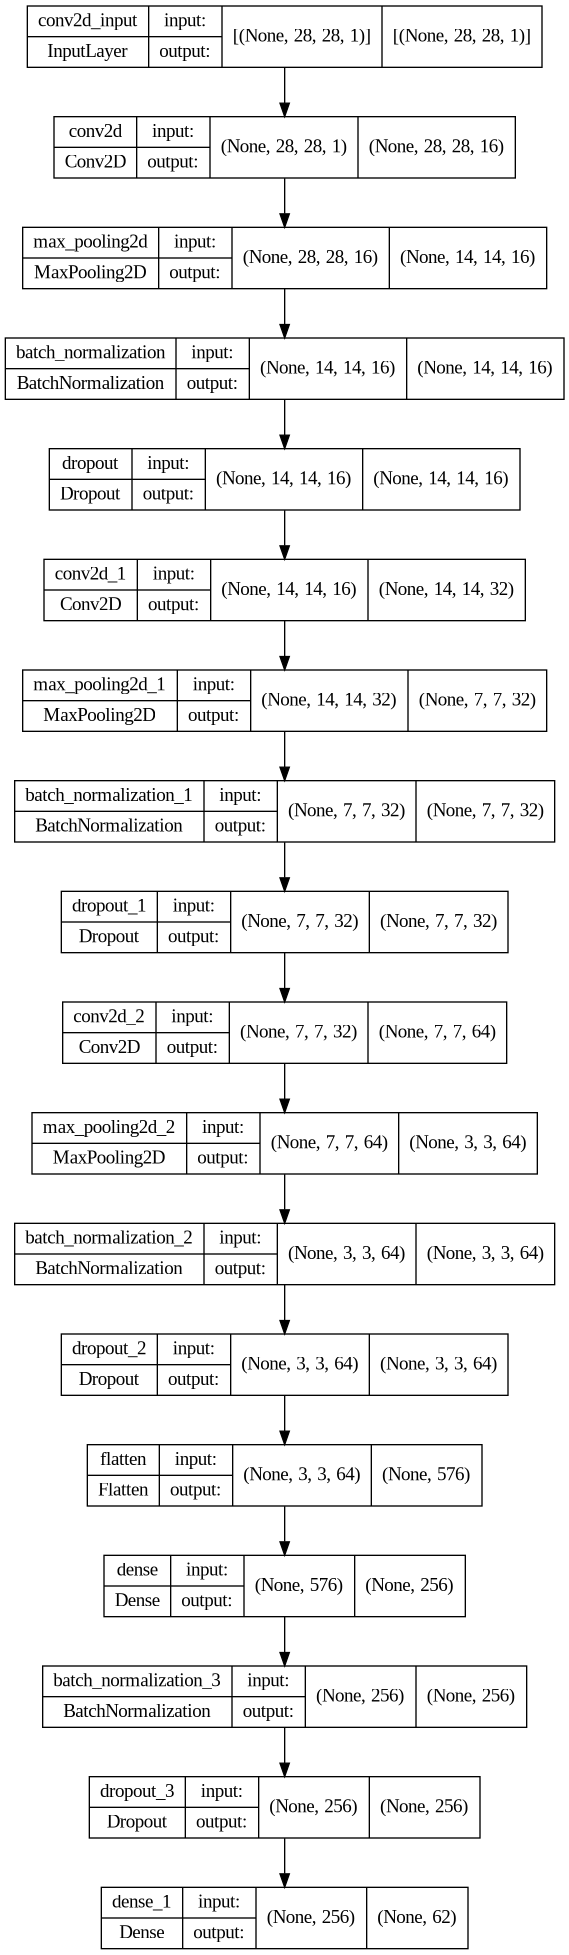

In [7]:
model.summary()
tf.keras.utils.plot_model(model, show_shapes=True)

In [8]:
es = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    mode='min',
    verbose=1,
    patience=10,
    restore_best_weights=True)

model.fit(x_train, y_train,
          # class_weight=class_weights,
          batch_size=1000,
          epochs=200,
          verbose=1,
          shuffle=True,
          validation_data=(x_test, y_test),
          callbacks=[es])

2022-06-10 19:23:47.918008: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 547178688 exceeds 10% of free system memory.
2022-06-10 19:23:48.329540: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 173087136 exceeds 10% of free system memory.
2022-06-10 19:23:48.488608: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 547178688 exceeds 10% of free system memory.


Epoch 1/200


2022-06-10 19:23:50.239408: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8400


698/698 [==============================] - 23s 29ms/step - loss: 0.8842 - accuracy: 0.7332 - val_loss: 0.4589 - val_accuracy: 0.8374
Epoch 2/200
698/698 [==============================] - 22s 31ms/step - loss: 0.5340 - accuracy: 0.8178 - val_loss: 0.4146 - val_accuracy: 0.8489
Epoch 3/200
698/698 [==============================] - 22s 32ms/step - loss: 0.4900 - accuracy: 0.8300 - val_loss: 0.3973 - val_accuracy: 0.8545
Epoch 4/200
698/698 [==============================] - 20s 29ms/step - loss: 0.4696 - accuracy: 0.8349 - val_loss: 0.3914 - val_accuracy: 0.8549
Epoch 5/200
698/698 [==============================] - 20s 29ms/step - loss: 0.4569 - accuracy: 0.8389 - val_loss: 0.3826 - val_accuracy: 0.8597
Epoch 6/200
698/698 [==============================] - 19s 28ms/step - loss: 0.4473 - accuracy: 0.8410 - val_loss: 0.3823 - val_accuracy: 0.8576
Epoch 7/200
698/698 [==============================] - 20s 28ms/step - loss: 0.4403 - accuracy: 0.8431 - val_loss: 0.3653 - val_accuracy: 0.86

In [9]:
model.save('emnist_fit_module')
# model = tf.keras.models.load_model('emnist_fit_module')
# import tensorflowjs as tfjs
# tfjs.converters.save_keras_model(model, 'tfjs_target_dir')

2022-06-10 19:44:34.609782: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: emnist_fit_module/assets


INFO:tensorflow:Assets written to: emnist_fit_module/assets


In [10]:
y_pred = model.predict(x_test)

In [11]:
aset = []
for i in range(len(y_train)):
    if (labels[np.argmax(y_train[i])] == 'A'):
        aset.append(i)
print(len(aset))

6407


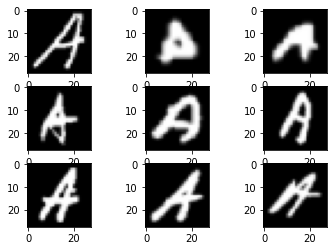

In [12]:
m = 312
f, axarr = plt.subplots(3,3)
for i in range(3):
    for j in range(3):
        axarr[i,j].imshow(x_train[aset[m + i * 3 + j]][:,:,0], plt.cm.gray)

'4'

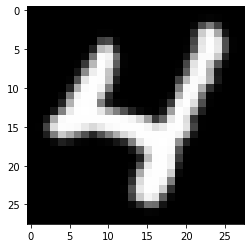

In [13]:
x=1522
plt.imshow(x_test[x][:,:,0], plt.cm.gray)
labels[np.argmax(y_pred[x])]

'M'

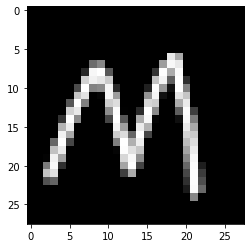

In [15]:
img = mpimg.imread('test.png')[:,:,0] * 255
plt.imshow(img, plt.cm.gray)
labels[np.argmax(model.predict(img.reshape(-1,28,28,1)))]